In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('c://BigData/DataScience/driver/chromedriver_win32/chromedriver.exe')


In [3]:
driver.get('http://www.opinet.co.kr/searRgSelect.do')

# 지역별 주소 찾기

In [4]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name('option')


In [5]:
gu_list[0]

<selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-2")>

In [6]:
gu_names =[option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [7]:
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(gu_names[8])

In [8]:
si_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
si_list = si_list_raw.find_elements_by_tag_name("option")
si_list

[<selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-23")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-24")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-25")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-26")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411e20ccab81", element="0.12394014538704679-27")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2abdc625ca561a1118fa411

In [9]:
si_names =[option.get_attribute("value") for option in si_list]
si_names.remove('')
si_names

['가평군',
 '고양시',
 '고양시덕양구',
 '고양시일산동구',
 '고양시일산서구',
 '과천시',
 '광명시',
 '광주시',
 '구리시',
 '군포시',
 '김포시',
 '남양주시',
 '동두천시',
 '부천시',
 '성남시',
 '성남시분당구',
 '성남시수정구',
 '성남시중원구',
 '수원시',
 '수원시권선구',
 '수원시영통구',
 '수원시장안구',
 '수원시팔달구',
 '시흥시',
 '안산시',
 '안산시단원구',
 '안산시상록구',
 '안성시',
 '안양시',
 '안양시동안구',
 '안양시만안구',
 '양주시',
 '양평군',
 '여주시',
 '연천군',
 '오산시',
 '용인시',
 '용인시기흥구',
 '용인시수지구',
 '용인시처인구',
 '의왕시',
 '의정부시',
 '이천시',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시']

In [10]:
len(si_names)

48

In [11]:
element1 = driver.find_element_by_id("SIGUNGU_NM0")
element1.send_keys(si_names[46])

In [12]:
xpath = """//*[@id="searRgSelect"]"""
element_sel_si = driver.find_element_by_xpath(xpath).click()

In [13]:
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

# 사는 지역 주유가격 데이터 정리

In [14]:
import pandas as pd
from glob import glob

In [15]:
glob("c://BigData/DataScience/data/지역*.xls")

['c://BigData/DataScience/data\\지역_위치별(주유소)_경기.xls']

In [16]:
station_file = glob('c://BigData/DataScience/data/지역*.xls')
station_file

['c://BigData/DataScience/data\\지역_위치별(주유소)_경기.xls']

In [17]:
tmp_raw = []

for file_name in station_file:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [18]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
지역       30 non-null object
상호       30 non-null object
주소       30 non-null object
상표       30 non-null object
전화번호     30 non-null object
셀프여부     30 non-null object
고급휘발유    30 non-null object
휘발유      30 non-null object
경유       30 non-null object
실내등유     30 non-null object
dtypes: object(10)
memory usage: 2.4+ KB


In [19]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,경기도,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),031-793-5800,N,1730,1390,1290,-
1,경기도,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,031-793-1355,N,-,1399,1299,-
2,경기도,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,031-795-5870,N,-,1408,1306,-
3,경기도,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,031-793-5184,N,-,1409,1309,1000
4,경기도,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,031-795-2001,Y,-,1465,1345,-


In [20]:
stations = pd.DataFrame({'Oil_store' : station_raw['상호'],
                         '주소':station_raw['주소'],                     
                         '상표':station_raw['상표'],
                         '셀프':station_raw['셀프여부'],  
                         '휘발유':station_raw['휘발유'],
                         '경유':station_raw['경유']})

stations.head()

,Oil_store,주소,상표,셀프,휘발유,경유
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390,1290
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399,1299
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408,1306
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409,1309
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465,1345


In [21]:
stations['시'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,상표,셀프,휘발유,경유,시
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390,1290,하남시
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399,1299,하남시
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408,1306,하남시
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409,1309,하남시
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465,1345,하남시


In [22]:
stations['시'].unique()

array(['하남시'], dtype=object)

In [23]:
stations

,Oil_store,주소,상표,셀프,휘발유,경유,시
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390,1290,하남시
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399,1299,하남시
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408,1306,하남시
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409,1309,하남시
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465,1345,하남시
5,(주)신화에너지서울,경기도 하남시 하남대로 829 (덕풍동),SK에너지,Y,1475,1345,하남시
6,초이주유소,경기도 하남시 천호대로 1427 (초이동),GS칼텍스,Y,1475,1345,하남시
7,동서울주유소,경기도 하남시 서하남로 372 (춘궁동),SK에너지,Y,1475,1345,하남시
8,개나리주유소,경기 하남시 대성로 145 (춘궁동),S-OIL,Y,1475,1345,하남시
9,신한국주유소,경기 하남시 동남로 516 (감북동),GS칼텍스,Y,1475,1345,하남시


In [24]:
stations = stations[stations['휘발유'] != '-']
stations

,Oil_store,주소,상표,셀프,휘발유,경유,시
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390,1290,하남시
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399,1299,하남시
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408,1306,하남시
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409,1309,하남시
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465,1345,하남시
5,(주)신화에너지서울,경기도 하남시 하남대로 829 (덕풍동),SK에너지,Y,1475,1345,하남시
6,초이주유소,경기도 하남시 천호대로 1427 (초이동),GS칼텍스,Y,1475,1345,하남시
7,동서울주유소,경기도 하남시 서하남로 372 (춘궁동),SK에너지,Y,1475,1345,하남시
8,개나리주유소,경기 하남시 대성로 145 (춘궁동),S-OIL,Y,1475,1345,하남시
9,신한국주유소,경기 하남시 동남로 516 (감북동),GS칼텍스,Y,1475,1345,하남시


In [25]:
stations['휘발유'] = [float(value) for value in stations['휘발유']]
stations['경유'] = [float(value) for value in stations['경유']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 7 columns):
Oil_store    29 non-null object
주소           29 non-null object
상표           29 non-null object
셀프           29 non-null object
휘발유          29 non-null float64
경유           29 non-null float64
시            29 non-null object
dtypes: float64(2), object(5)
memory usage: 1.8+ KB


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
import platform

path ="C://Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

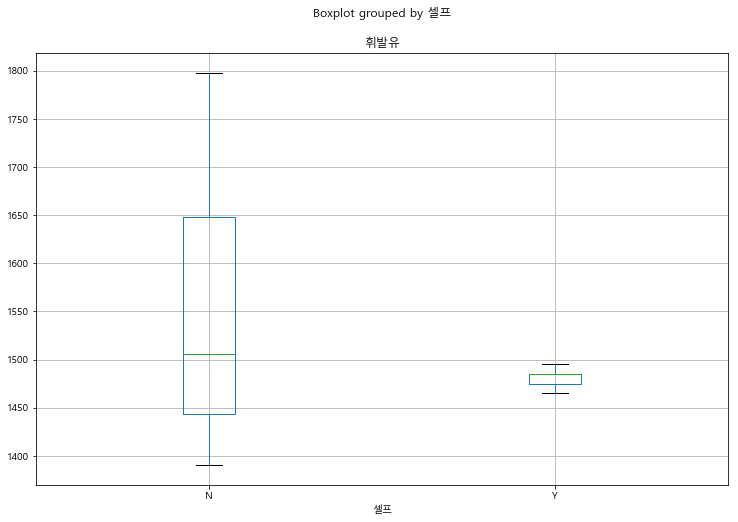

In [28]:
stations.boxplot(column ='휘발유', by='셀프', figsize=(12,8));

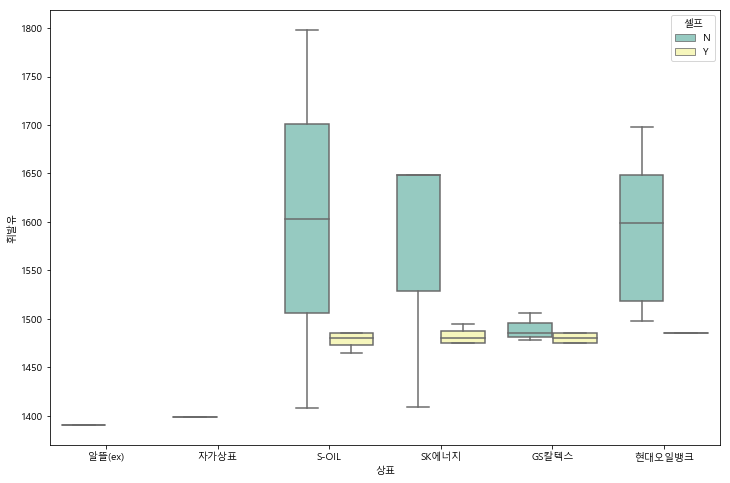

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y ='휘발유', hue='셀프', data = stations, palette='Set3' )
plt.show()

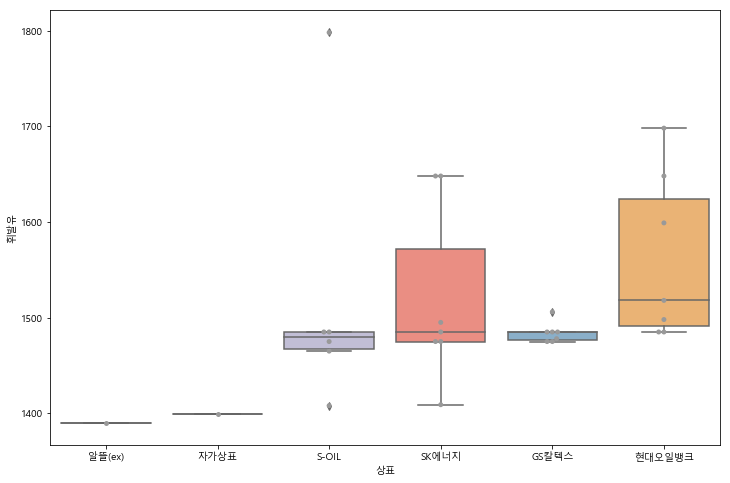

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='휘발유', data=stations, palette='Set3')
sns.swarmplot(x='상표',y='휘발유', data =stations, color='.6')
plt.show()

# 주유가격 확인하기

In [31]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action="ignore", category= FutureWarning)

In [32]:
stations.sort_values(by='휘발유', ascending=False).head()

,Oil_store,주소,상표,셀프,휘발유,경유,시
28,서하남나들목주유소,경기 하남시 서하남로 29 (감북동),S-OIL,N,1798.0,1595.0,하남시
27,서하남배다리주유소,경기 하남시 서하남로 (감북동),현대오일뱅크,N,1698.0,1498.0,하남시
26,SK서하남IC주유소,경기도 하남시 서하남로 28(감북동),SK에너지,N,1648.0,1498.0,하남시
25,서하남고속주유소,경기 하남시 서하남로 77 (감북동),SK에너지,N,1648.0,1498.0,하남시
24,광암에너지주유소,경기도 하남시 초광로 75 (광암동),현대오일뱅크,N,1648.0,1498.0,하남시


In [33]:
stations.sort_values(by='휘발유', ascending=True).head()

,Oil_store,주소,상표,셀프,휘발유,경유,시
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390.0,1290.0,하남시
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399.0,1299.0,하남시
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408.0,1306.0,하남시
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409.0,1309.0,하남시
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465.0,1345.0,하남시


In [34]:
gmap_key ="***"
gmaps = googlemaps.Client(key=gmap_key)

In [35]:
oil_price_top5 = stations.sort_values(by='휘발유', ascending=False).head()
oil_price_bottom5 = stations.sort_values(by='휘발유', ascending=True).head()
oil_price_bottom5

,Oil_store,주소,상표,셀프,휘발유,경유,시
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390.0,1290.0,하남시
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399.0,1299.0,하남시
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408.0,1306.0,하남시
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409.0,1309.0,하남시
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465.0,1345.0,하남시


In [36]:
from tqdm import tqdm_notebook
import numpy as np

lat =[]
lng =[]

for n in tqdm_notebook(oil_price_bottom5.index):
    try:
        tmp_add = str(oil_price_bottom5['주소'][n])
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("here is nan!!!")
        
oil_price_bottom5['lat'] = lat
oil_price_bottom5['lng'] = lng
oil_price_bottom5

,Oil_store,주소,상표,셀프,휘발유,경유,시,lat,lng
0,하남만남주유소/충전소,경기 하남시 중부고속도로 117-1,알뜰(ex),N,1390.0,1290.0,하남시,37.530293,127.206059
1,약수터주유소,경기 하남시 하남대로 63 (상산곡동),자가상표,N,1399.0,1299.0,하남시,37.499940,127.233796
2,한국도로서하남주유소,경기도 하남시 서울외곽순환고속도로 19 (춘궁동),S-OIL,N,1408.0,1306.0,하남시,37.529321,127.197845
3,산곡주유소,경기 하남시 하남대로 273 (상산곡동),SK에너지,N,1409.0,1309.0,하남시,37.490678,127.234483
4,셀프광장주유소,경기 하남시 창우로 56 (창우동),S-OIL,Y,1465.0,1345.0,하남시,37.531611,127.225886


In [37]:
map = folium.Map(location=[oil_price_bottom5['lat'].mean(), oil_price_bottom5['lng'].mean()], zoom_start=10.5)

for n in oil_price_bottom5.index:
    if pd.notnull(oil_price_bottom5['lat'][n]):
        folium.CircleMarker([oil_price_bottom5['lat'][n], oil_price_bottom5['lng'][n]], radius=15, color='#CD3181',fill_color='#CD3181').add_to(map)

map